In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
universities = pd.read_csv('data/Universities.csv', index_col=0)

In [3]:
universities.head()

,name,domain,mail,authorindex,file,country
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,import2016full/61,United States
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,import2016full/61,Netherlands
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,import2016full/61,Netherlands
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,import2016full/61,Netherlands
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,import2016full/59,United States


## Base analysis of Universities present in dataset

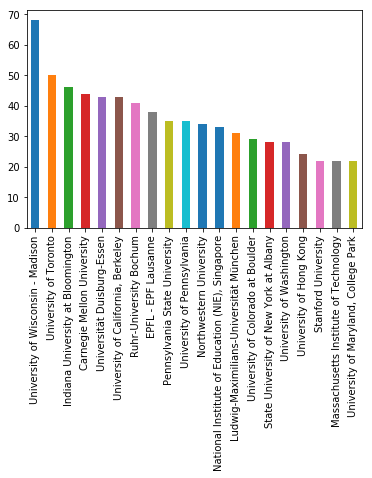

In [4]:
universities[universities.name != 'gmail'].name.value_counts().head(20).plot(kind='bar')

A given university makes up a tiny percentage overall:

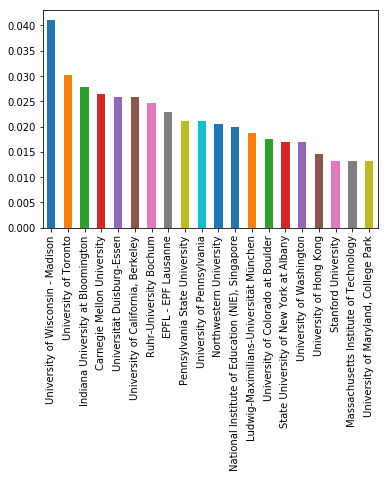

In [5]:
(universities[universities.name != 'gmail'].name.value_counts().head(20)/universities.shape[0]).plot(kind='bar')

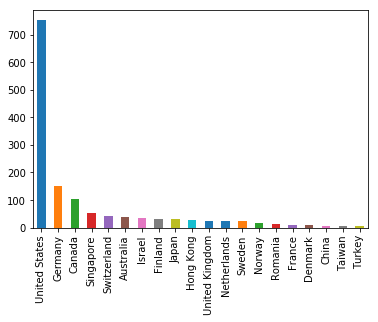

In [6]:
universities.country.value_counts().head(20).plot(kind = 'bar')

## Looking at who is where, if there are any movements:

In [7]:
metadata = pd.read_csv('data/Parsed_metadata.csv', index_col=0)

In [8]:
metadata.head(2)

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names
0,import2016short/167,NaN,en,https://doi.dx.org/10.22318/icls2016.167,Book chapter,Singapore: International Society of the Learni...,Future Learning Spaces for Learning Communitie...,2016-07,2017-06-19 11:36:42+00:00,"Hod, Y., Charles, E. S., Acosta, A., Ben-Zvi, ...",2017-06-19 11:36:42+00:00,This symposium presents our efforts to reconce...,"Weiss, Patrice L. Tamar",23,15,Weiss P. L.
1,import2015short/1110,"['learning communities', 'networked society', ...",en,https://doi.dx.org/10.22318/cscl2015.1110,Book chapter,International Society of the Learning Science...,Technology-Enhanced Learning Communities on a ...,2015-07,2017-06-19 14:51:54+00:00,"Kali, Y., Tabak, I., Ben-Zvi, D., Kidron, A., ...",2017-06-19 14:51:54+00:00,This symposium brings together the theoretical...,"Weiss, Patrice L.",17,15,Weiss P. L.


In [9]:
metadata.columns

Index(['file', 'subject', 'iso', 'uri', 'type', 'publisher', 'title', 'issued',
       'accessioned', 'citation', 'available', 'abstract', 'value',
       'author_name_length', 'author_order', 'shortend_names'],
      dtype='object')

In [10]:
universities['merge_index'] = universities.apply(lambda x: x['file']+str(x['authorindex']), axis=1)
metadata['merge_index'] = metadata.apply(lambda x: x['file']+str(x['author_order']), axis=1)

In [11]:
pd.merge(universities, metadata, on='merge_index').sample(10)[['mail', 'shortend_names']]

,mail,shortend_names
988,soeren.werneburg@gmail.com,Werneburg S.
151,jah.cunningham5@gmail.com,Cunningham J.
926,nvmudric@ncsu.edu,Mudrick N.
840,vanaalst@hku.hk,Aalst J.
1234,kristine.lund@ens-lyon.fr,Lund K.
497,sven.heimbuch@uni-due.de,Heimbuch S.
487,Sandra.Becker@psy.lmu.de,Becker S.
905,i.h.krange@iped.uio.no,Krange I.
802,wagma.mommandi@colorado.edu,Mommandi W.
1067,brendita@uic.edu,Silva B. L.


In [12]:
associations = pd.merge(universities, metadata, on='merge_index')

In [13]:
name_country = associations[['shortend_names','country', 'name']]

In [14]:
name_country.shape

(1650, 3)

# Looking at people moving around

In [15]:
df = pd.merge(name_country, name_country, on='shortend_names').dropna()
df[df.country_x != df.country_y].drop_duplicates()[['shortend_names', 'country_x', 'country_y']]

,shortend_names,country_x,country_y
933,Sun Z.,Denmark,United States
935,Sun Z.,United States,Denmark
1664,Tan E.,United States,Germany
1666,Tan E.,Germany,United States
2234,Weinberger A.,Germany,Israel
2244,Weinberger A.,Israel,Germany
2486,Wise A. F.,Canada,United States
2495,Wise A. F.,United States,Canada
2686,Prieto L. P.,Switzerland,Estonia
2702,Prieto L. P.,Estonia,Switzerland


In [16]:
df[df.country_x != df.country_y].drop_duplicates().shape[0]/2

11.0

In [17]:
df = pd.merge(name_country, name_country, on='shortend_names').dropna()
df[(df.name_x != df.name_y) & (df.country_x == df.country_y)].drop_duplicates()[['shortend_names', 'name_x', 'name_y']]

,shortend_names,name_x,name_y
85,McKenney S.,University of Twente,Open University of the Netherlands
87,McKenney S.,Open University of the Netherlands,University of Twente
102,Schneider B.,Stanford University,Harvard University
158,Schneider B.,Harvard University,Stanford University
177,Sharma K.,EPFL - EPF Lausanne,Université de Lausanne
186,Sharma K.,Université de Lausanne,EPFL - EPF Lausanne
717,Loibl K.,Ruhr-University Bochum,Pädagogische Hochschule Freiburg
723,Loibl K.,Pädagogische Hochschule Freiburg,Ruhr-University Bochum
824,Csanadi A.,Ludwig-Maximilians-Universität München,Technische Universität Darmstadt
826,Csanadi A.,Technische Universität Darmstadt,Ludwig-Maximilians-Universität München


In [18]:
df[(df.name_x != df.name_y) & (df.country_x == df.country_y)].drop_duplicates().shape[0]/2

18.0

investigating change of email adress::

In [19]:
associations[['mail', ]]
df = pd.merge(associations, associations, on='shortend_names')

In [20]:
df[df.mail_x != df.mail_y][['mail_x', 'mail_y']].drop_duplicates()

,mail_x,mail_y
30,christine.lee.ucla@gmail.com,asmsaleh@indiana.edu
33,asmsaleh@indiana.edu,christine.lee.ucla@gmail.com
46,enyedy@gseis.ucla.edu,christine.lee.ucla@gmail.com
49,christine.lee.ucla@gmail.com,enyedy@gseis.ucla.edu
62,randy@remap.ucla.edu,enyedy@gseis.ucla.edu
65,enyedy@gseis.ucla.edu,randy@remap.ucla.edu
85,susan.mckenney@utwente.nl,susan.mckenney@ou.nl
87,susan.mckenney@ou.nl,susan.mckenney@utwente.nl
102,schneibe@stanford.edu,schneider@gse.harvard.edu
158,schneider@gse.harvard.edu,schneibe@stanford.edu


# Looking at where people collaborate:

In [21]:
pub_collab = associations[['file_x','country']].drop_duplicates()

In [22]:
collabs = pd.merge(pub_collab, pub_collab, on='file_x').drop_duplicates()

In [23]:
collabs.head()

,file_x,country_x,country_y
0,import2016full/61,United States,United States
1,import2016full/61,United States,Netherlands
2,import2016full/61,Netherlands,United States
3,import2016full/61,Netherlands,Netherlands
4,import2016full/59,United States,United States


Building collaboration graph:

In [28]:
nodes = pd.DataFrame(collabs.country_x.dropna().unique())
nodes.columns = ['country']
nodes.reset_index(inplace=True)

In [29]:
nodes

,index,country
0,0,United States
1,1,Netherlands
2,2,United Kingdom
3,3,Switzerland
4,4,Finland
5,5,Singapore
6,6,Germany
7,7,Israel
8,8,India
9,9,Norway


In [31]:
edges = pd.merge(nodes, collabs[collabs.country_x != collabs.country_y], left_on='country', right_on='country_x')
edges = pd.merge(nodes, edges, left_on='country', right_on='country_y')
edges[['index_x', 'index_y']]

,index_x,index_y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,2


In [32]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    i, j = int(row.index_x), int(row.index_y)
    adjacency[i, j] += 1

In [33]:
adjacency

array([[0, 9, 7, ..., 0, 0, 1],
       [9, 0, 2, ..., 0, 1, 1],
       [7, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [35]:
import networkx as nx

In [36]:
graph = nx.from_numpy_array(adjacency)

In [38]:
mapping = nodes.country.to_dict()

H=nx.relabel_nodes(graph,mapping)
print(sorted(H.nodes()))

nx.write_gexf(H, 'data/country_graph.gexf')

['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Hong Kong', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Republic of', 'Netherlands', 'Norway', 'Qatar', 'Romania', 'Singapore', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom', 'United States']


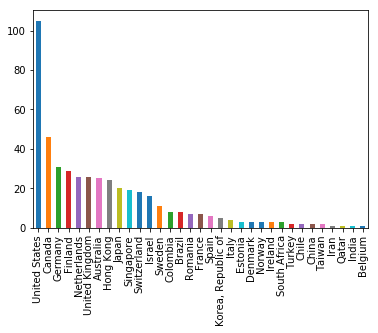

In [27]:
collabs[collabs.country_x != collabs.country_y].dropna().country_x.value_counts().plot(kind='bar')